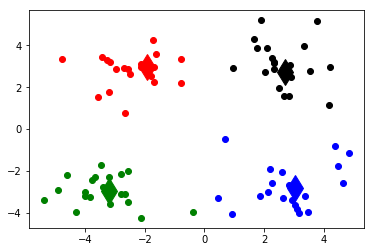

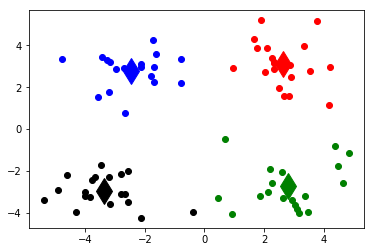

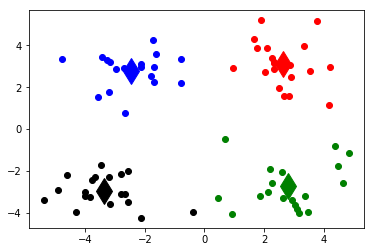

In [8]:
import numpy as np
import random
import re
import matplotlib.pyplot as plt

def loadDataSet():
    dataSet = np.loadtxt("data.txt")
    return dataSet

def calcuDistance(vec1, vec2):
    # 计算向量1与向量2之间的欧式距离
    return np.sqrt(np.sum(np.square(vec1 - vec2)))  #注意这里的减号

def initCentroids(dataSet, k):
    # 从数据集中随机选取k个数据返回
    dataSet = list(dataSet)
    return random.sample(dataSet, k)

def minDistance(dataSet, centroidList):
    #更新簇类

    # 对每个属于dataSet的item， 计算item与centroidList中k个质心的距离，找出距离最小的，并将item加入相应的簇类中
    clusterDict = dict() #dict保存簇类结果
    k = len(centroidList)
    for item in dataSet:
        vec1 = item
        flag = -1
        minDis = float("inf") # 初始化为最大值
        for i in range(k):
            vec2 = centroidList[i]
            distance = calcuDistance(vec1, vec2)  # error
            if distance < minDis:
                minDis = distance
                flag = i  # 循环结束时， flag保存与当前item最近的蔟标记
        if flag not in clusterDict.keys():
            clusterDict.setdefault(flag, [])
        clusterDict[flag].append(item)  #加入相应的类别中
    return clusterDict  #不同的类别

def getCentroids(clusterDict):
    #更新质心
    
    #重新计算k个质心
    centroidList = []
    for key in clusterDict.keys():
        centroid = np.mean(clusterDict[key], axis=0)
        centroidList.append(centroid)
    return centroidList  #得到新的质心

def getError(centroidList, clusterDict):
    # 计算各蔟集合间的均方误差
    # 将蔟类中各个向量与质心的距离累加求和
    sum = 0.0
    for key in clusterDict.keys():
        vec1 = centroidList[key]
        distance = 0.0
        for item in clusterDict[key]:
            vec2 = item
            distance += calcuDistance(vec1, vec2)
        sum += distance
    return sum
   

def showCluster(centroidList, clusterDict):
    # 展示聚类结果
    colorMark = ['or', 'ob', 'og', 'ok', 'oy', 'ow'] #不同簇类标记，o表示圆形，另一个表示颜色
    centroidMark = ['dr', 'db', 'dg', 'dk', 'dy', 'dw']

    for key in clusterDict.keys():
        plt.plot(centroidList[key][0], centroidList[key][1], centroidMark[key], markersize=18) #质心点
        for item in clusterDict[key]:
            plt.plot(item[0], item[1], colorMark[key])
    plt.show()


def test_k_means():
    dataSet = loadDataSet()
    centroidList = initCentroids(dataSet, 4)
    clusterDict = minDistance(dataSet, centroidList)
    # # getCentroids(clusterDict)
    # showCluster(centroidList, clusterDict)
    newError = getError(centroidList, clusterDict)
    oldError = 1  # 当两次聚类的误差小于某个值是，说明质心基本确定。

    times = 2
    while abs(newError - oldError) >= 0.00001:
        centroidList = getCentroids(clusterDict)#得到质心
        clusterDict = minDistance(dataSet, centroidList)#更新簇
        oldError = newError
        newError = getError(centroidList, clusterDict)
        times += 1
        showCluster(centroidList, clusterDict)

if __name__ == '__main__':
    # show_fig()
    test_k_means()
